# Coursework 2: Neural Networks 

### Alessandro Serena - as6316 - CID 01188591

This coursework covers the topics covered in class regarding neural networks for image classification.

This coursework includes both coding questions as well as written ones. Please upload the notebook, which contains your code, results and answers as a pdf file onto Cate.

Dependencies: If you work on a college computer in the Computing Lab, where Ubuntu 18.04 is installed by default, you can use the following virtual environment for your work, where relevant Python packages are already installed.

`source /vol/bitbucket/wbai/virt/computer_vision_ubuntu18.04/bin/activate`

Alternatively, you can use pip, pip3 or anaconda etc to install Python packages.

**Note 1:** please read the both the text and code comment in this notebook to get an idea what you are supposed to implement.

**Note 2:** If you are using the virtual environment in the Computing Lab, please run the following command in the command line before opening jupyter-notebook and importing tensorflow. This will tell tensorflow where the Nvidia CUDA libariries are.

`export LD_LIBRARY_PATH=/vol/cuda/9.0.176/lib64/:"${LD_LIBRARY_PATH}}"` 

In [1]:
# Import libraries
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline
import tensorflow as tf 
import keras
from keras.models import Sequential
from keras.layers import Input,Dense, Dropout, Flatten
import pydot
import itertools
import matplotlib.image as mpimg

Using TensorFlow backend.


## Question 1 (20 points)

Throughout this coursework you will be working with the Fashion-MNIST dataset. If you are interested, you may find relevant information regarding the dataset in this paper.

[1] Fashion-MNIST: A novel image dataset for benchmarking machine learning algorithms. Han Xiao, Kashif Rasul, Roland Vollgraf. [arXiv:1708.07747](https://arxiv.org/abs/1708.07747)

Be sure that you have the following files in your working directory: data.tar.gz and reader.py. Loading the data can be done as follows:

`from reader import get_images
(x_train, y_train), (x_test, y_test) = get_images()`

The dataset is already split into a set of 60,000 training images and a set of 10,000 test images. The images are of size 28x28 pixels and stored as 784-D vector. So if you would like to visualise the images, you need to reshape the array.

There are in total 10 label classes, which are:
* 0: T-shirt/top
* 1: Trousers
* 2: Pullover
* 3: Dress
* 4: Coat
* 5: Sandal
* 6: Shirt
* 7: Sneaker
* 8: Bag
* 9: Ankle boot

### 1.1 Load data (6 points)
Load the dataset and print the dimensions of the training set and the test set.

In [3]:
from reader import get_images
(x_train, y_train), (x_test, y_test) = get_images()
print(y, test)

NameError: name 'y' is not defined

### 1.2 Visualize data (6 points)
Visualise 3 training images (T-shirt, trousers and pullover) and 3 test images (dress, coat and sandal).

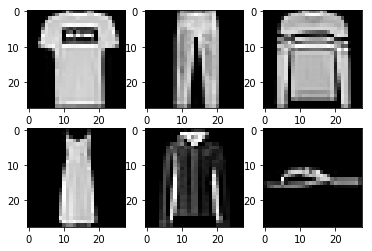

In [3]:
indexList = [None,None,None]
# copy first 20 elements of training labels 
tempList = []
for i in range(20):
    tempList.append(y_train[i])

#find requested classes in labels
indexList[0] = tempList.index(0)
indexList[1] = tempList.index(1)
indexList[2] = tempList.index(2)
    
# plot images from training data
for index in indexList:
    plt.subplot(2, 3, indexList.index(index)+1)
    trainPlot = x_train[index].reshape(28,28)
    plt.imshow(trainPlot, cmap='gray')
    
# ==========================================================

indexList = [None,None,None]
# copy first 20 elements of training labels 
tempList = []
for i in range(20):
    tempList.append(y_test[i])

#find requested classes in labels
indexList[0] = tempList.index(3)
indexList[1] = tempList.index(4)
indexList[2] = tempList.index(5)
    
# plot images from test data
for index in indexList:
    plt.subplot(2, 3, indexList.index(index)+4)
    testPlot = x_test[index].reshape(28,28)
    plt.imshow(testPlot, cmap='gray')

### 1.3 Data balance (4 points)
Print out the number of training samples for each class.

In [4]:
# initialize array of (10) zeroes
classCount = np.zeros(10)

# iterate through y_train and count how many samples there are for each class
for i in range(len(y_train)):
    category = y_train[i]
    classCount[category] += 1

# print result
print("The number of occurrences of each class in the training data are:")
print classCount

The number of occurrences of each class in the training data are:
[6000. 6000. 6000. 6000. 6000. 6000. 6000. 6000. 6000. 6000.]


### 1.4 Discussion (4 points)
Is the dataset balanced? What would happen if the dataset is not balanced in the context of image classification? 

Since each class has the same number of training samples (6000 each) we can state that the dataset is balanced.
If the dataset was not balenced, we would expect a biased model.
In other words, the model would perform better at classifying images of a class with more training data and worse for those belonging to a class that it has seen less frequently during training. Moreover, the model might classify wrongly images from the class with less training data as belonging to the class more frequently encountered.

## Question 2 (40 points)

Build a neural network and train it with the Fashion-MNIST dataset. Here, we use the keras library, which is a high-level neural network library built upon tensorflow.

In [5]:
# Convert the label class into a one-hot representation
num_classes = 10

print(y_train[1])

y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

print(y_train[1])

0
[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


### 2.1 Build a multi-layer perceptron, also known as multi-layer fully connected network. You need to define the layers, the loss function, the optimiser and evaluation metric. (30 points)

In [6]:
# MLP --> 784 x 400 x 150 x 50 x 10
model = None
model = keras.models.Sequential()
# ------------------------------------
# DEFINE LAYERS
model.add(Dense(125, input_shape=(784,), activation="sigmoid"))
# output layer
model.add(Dense(10, activation="softmax"))
# ------------------------------------
# DEFINE TRAINING PARAMETERS
model.compile(loss="categorical_crossentropy", 
              optimizer="sgd", 
              metrics=["accuracy"])
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 125)               98125     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1260      
Total params: 99,385
Trainable params: 99,385
Non-trainable params: 0
_________________________________________________________________
None


### 2.2 Define the optimisation parameters including the batch size and the number of epochs and then run the optimiser. (10 points)

We have tested that for an appropriate network architecture, on a personal laptop and with only CPU, it takes about a few seconds per epoch to train the network. For 100 epochs, it takes about a coffee break's time to finish the training. If you run it on a powerful GPU, it would be even much faster.

In [7]:
batch_size = 300
epochs = 100
model.fit(x_train, y_train, batch_size, epochs)

Epoch 1/100
60000/60000 [==============================] - 7s 110us/step - loss: 1.3076 - acc: 0.6196
Epoch 2/100
60000/60000 [==============================] - 6s 106us/step - loss: 0.8345 - acc: 0.7515
Epoch 3/100
60000/60000 [==============================] - 6s 103us/step - loss: 0.7173 - acc: 0.7776
Epoch 4/100
60000/60000 [==============================] - 6s 106us/step - loss: 0.6517 - acc: 0.7932
Epoch 5/100
60000/60000 [==============================] - 6s 99us/step - loss: 0.6083 - acc: 0.8041
Epoch 6/100
60000/60000 [==============================] - 6s 97us/step - loss: 0.5799 - acc: 0.8099
Epoch 7/100
60000/60000 [==============================] - 6s 98us/step - loss: 0.5569 - acc: 0.8160
Epoch 8/100
60000/60000 [==============================] - 6s 97us/step - loss: 0.5364 - acc: 0.8209
Epoch 9/100
60000/60000 [==============================] - 6s 102us/step - loss: 0.5212 - acc: 0.8236
Epoch 10/100
60000/60000 [==============================] - 6s 104us/step - loss: 0.51

## Question 3 (20 points) 

Evaluate the performance of your network with the test data. 
Visualize the performance using appropriate metrics and graphs (eg. confusion matrix). 
Comment on your per class performance and how it could be better.

In [8]:
# This function is provided for you to display the confusion matrix.
# For more information about the confusion matrix, you can read at
# https://en.wikipedia.org/wiki/Confusion_matrix
def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.Blues):
    """
        This function prints and plots the confusion matrix.
        
        cm: confusion matrix, default to be np.int32 data type
        classes: a list of the class labels or class names
        normalize: normalize the matrix so that each row amounts to one
        cmap: color map
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')
    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else '.0f'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

### 3.1 Evaluate the classification accuracy on the test set (10 points)

In [9]:
score = model.evaluate(x_test, y_test)
print "Test loss    : ", score[0]
print "Test accuracy: ", score[1]*100, "%"

10000/10000 [==============================] - 1s 103us/step
Test loss    :  0.41214703214168547
Test accuracy:  85.50999999999999 %


### 3.2 Calculate and plot the confusion matrix (10 points)

Normalized confusion matrix
[[8.07920792e-01 4.95049505e-03 1.48514851e-02 2.77227723e-02
  0.00000000e+00 9.90099010e-04 1.40594059e-01 0.00000000e+00
  2.97029703e-03 0.00000000e+00]
 [2.08333333e-03 9.83333333e-01 1.04166667e-03 1.04166667e-02
  0.00000000e+00 0.00000000e+00 2.08333333e-03 0.00000000e+00
  1.04166667e-03 0.00000000e+00]
 [1.62835249e-02 9.57854406e-03 7.35632184e-01 1.24521073e-02
  1.15900383e-01 0.00000000e+00 1.04406130e-01 0.00000000e+00
  5.74712644e-03 0.00000000e+00]
 [4.03846154e-02 3.07692308e-02 1.63461538e-02 8.42307692e-01
  2.88461538e-02 1.92307692e-03 3.36538462e-02 0.00000000e+00
  5.76923077e-03 0.00000000e+00]
 [2.91545190e-03 3.88726919e-03 1.10787172e-01 3.59572400e-02
  7.50242954e-01 0.00000000e+00 9.13508260e-02 0.00000000e+00
  4.85908649e-03 0.00000000e+00]
 [1.05485232e-03 0.00000000e+00 1.05485232e-03 1.05485232e-03
  0.00000000e+00 9.65189873e-01 0.00000000e+00 2.32067511e-02
  2.10970464e-03 6.32911392e-03]
 [1.17977528e-01 3.37078652e-0

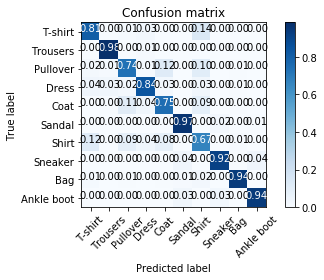

In [13]:
# Get predictions on test data
predictions = model.predict(x_test)
predictions.tolist()
y_true = y_test.tolist()

# Turn prediction into a 1-hot encoded array
for i in range(len(predictions)):
    maxVal = max(predictions[i])
    for j in range(len(predictions[i])):
        if (predictions[i][j] < maxVal):
            predictions[i][j] = 0
        else:
            predictions[i][j] = 1

#Get CM data
cm = np.zeros((10,10))
for i in range(len(y_true)):
    classPredicted = np.where(predictions[i] == 1)[0][0]
    classTrue = np.where(y_test[i] == 1)[0][0]
    assert(classPredicted in range(10))
    assert(classTrue in range(10))
    cm[classPredicted][classTrue] += 1

#Plot CM
classes = ["T-shirt","Trousers","Pullover","Dress","Coat","Sandal","Shirt","Sneaker","Bag","Ankle boot"]
plot_confusion_matrix(cm, classes, normalize=True)


### Comment on your per class performance and how it could be better.

As we can see from the Confusion Matrix above, the model is in general working correctly. Objects are well classified, especially those belonging to classes that cannot be easily mistaken with others (i.e. trousers, sandals, sneakers, bags, ankle boots). Because they have very specific shapes and figures, the model correctly identifies them with more than 90% of accuracy.

Other classes, such as t-shirts, pullovers, coats and shirt, have a mjuch more similar shape (chest-like) and they are sometimes mistaken one for the other. In particular we can note that long-sleeved garments are more likely to be mistaken for another long-sleeved piece of clothing.
By looking at the Confusion Matrix we note they all score between 67% and 84%.

The model could be better if we trained it with more samples belonging to the lower-scoring classes. 

## Question 4 (20 points)
Take two photos, one of your clothes or shoes that belongs to one of 10 classes, the other that does not belong to any class.

Use either Python or other software (Photoshop, Gimp, or any image editer) to convert the photos into grayscale, crop the region of interest and reshape into the size of 28x28.

### 4.1 Load and visualise your own images (6 points)

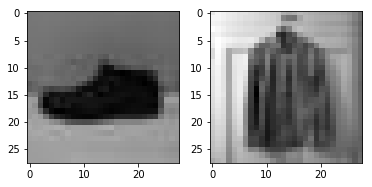

In [11]:
plt.subplot(1,2,1)
img=mpimg.imread('shoe_lowRes.jpg')
imgplot = plt.imshow(img, cmap="gray")
plt.subplot(1,2,2)
img2=mpimg.imread('longSleeved_tshirt_lowRes.jpg')
imgplot2 = plt.imshow(img2, cmap="gray")
plt.show()

### 4.2 Test your network on the two images and show the classification results (10 points)

In [12]:
from PIL import Image

# function for extracting pixel values from image
def getPixels(fileName):
    im = Image.open(fileName)
    im.convert('L')
    data = []
    for row in range(28):
        for col in range(28):
            r = im.getpixel((col, row))
            if type(r) is not int:
                data.append(r[0])
            else:
                data.append(r)
    return data

#Get array-like data from images
shoeData = getPixels("shoe_lowRes.jpg")
LSTshirtData = getPixels("longSleeved_tshirt_lowRes.jpg")
x_customTest = np.array([shoeData, LSTshirtData])

predictions = []
# Evaluate model performance
predictions = model.predict(x_customTest)

# Turn prediction into a 1-hot encoded array
for i in range(len(predictions)):
    maxVal = max(predictions[i])
    for j in range(len(predictions[i])):
        if (predictions[i][j] < maxVal):
            predictions[i][j] = 0
        else:
            predictions[i][j] = 1
print predictions

[[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]]


### 4.3 Discuss the classification results and provide one method to improve real life performance of the network (4 points)

As we can see from the output above, our two sample images get classified wrongly (both as bags in this case).
This is caused by the way the model has been trained. In facts, only Fashion-MNIST data has been used in the training phase and this makes the model very effective when classifying the same type of images (plain black background and sharp edges), as in the testing phase.
When, on the other hand, we try to use different images (as the ones above) the result is negative because the model has never encountered images that have similar characteristics to those two.

An approach to improve real life performace of this classifying model is to train it with different data, outside of the Fashion-MNIST database.


## 5. Survey
How long did the coursework take you to solve? 

6 hours